In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/datafinal.csv')
df

,Unnamed: 0.1,Unnamed: 0,tweet,label
0,0,0,"I`d have responded, if I were going",2
1,1,1,Sooo SAD I will miss you here in San Diego!!!,0
2,2,2,my boss is bullying me...,0
3,3,3,what interview! leave me alone,0
4,4,4,"Sons of ****, why couldn`t they put them on t...",0
...,...,...,...,...
127475,127475,99995,Now need 8 followers to compleate 1000 Follow...,1
127476,127476,99996,I knew I had to explain something to my friend...,1
127477,127477,99997,done tweeting..... til tomorrow..,1
127478,127478,99998,@cmozilo Act II set is pretty breath-taking -L...,1


In [ ]:
# Data Cleaning
df = df[['tweet', 'label']]
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df

,tweet,label
0,"I`d have responded, if I were going",2
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0
...,...,...
127475,Now need 8 followers to compleate 1000 Follow...,1
127476,I knew I had to explain something to my friend...,1
127477,done tweeting..... til tomorrow..,1
127478,@cmozilo Act II set is pretty breath-taking -L...,1


In [ ]:
df.isnull().sum()

tweet    0
label    0
dtype: int64

In [ ]:
df.isnull().any()

tweet    False
label    False
dtype: bool

In [ ]:
df.shape

(127480, 2)

In [ ]:
df['label'].value_counts()

1    58582
0    57781
2    11117
Name: label, dtype: int64

<Axes: >

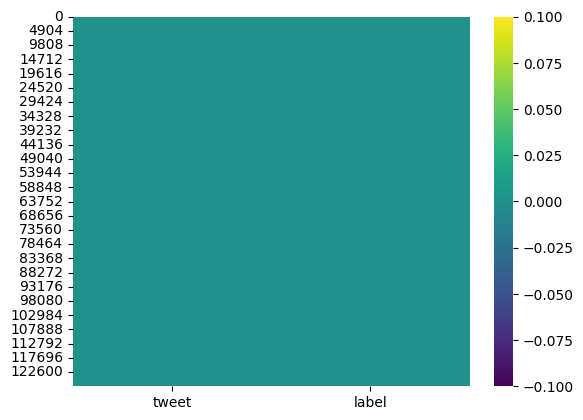

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(), linecolor="red",cmap="viridis")



In [ ]:
# Renaming columns names to make them more readable
df.rename({'tweet':'text','label':'sentiment'}, axis = 1, inplace = True)
df

,text,sentiment
0,"I`d have responded, if I were going",2
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0
...,...,...
127475,Now need 8 followers to compleate 1000 Follow...,1
127476,I knew I had to explain something to my friend...,1
127477,done tweeting..... til tomorrow..,1
127478,@cmozilo Act II set is pretty breath-taking -L...,1


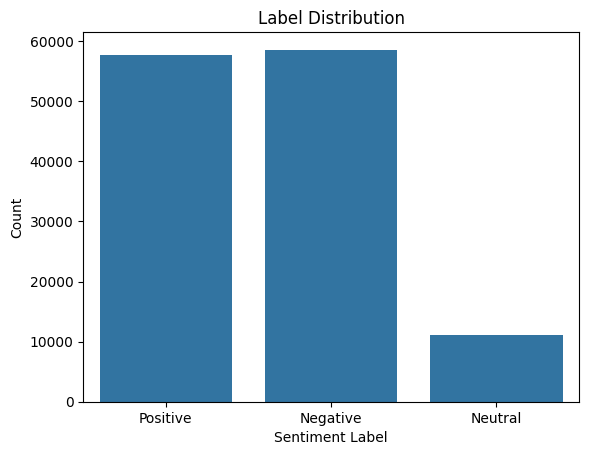

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sentiment' column contains sentiment labels as integers (0, 1, 2)

# Count the occurrences of each sentiment label
label_counts = df['sentiment'].value_counts()

# Create a bar chart using Seaborn
sns.barplot(x=label_counts.index, y=label_counts.values)

# Rename x-ticks to match sentiment labels
plt.xticks(ticks=label_counts.index, labels=['Negative', 'Positive', 'Neutral'])

# Add labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Label Distribution')

# Show the plot
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


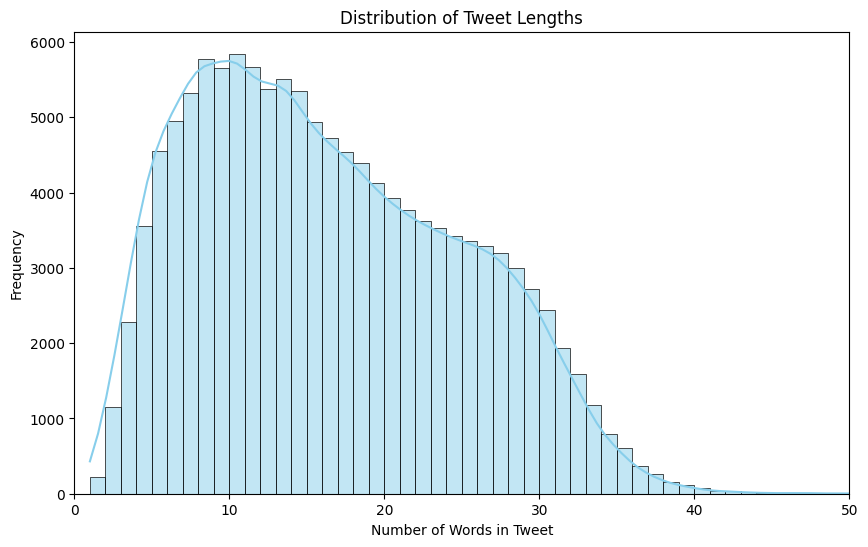

In [ ]:
#Visualising the distribution of length of tweets
# Tokenize the tweets to count the number of words
import nltk
import string
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
df['initial_tweet_length'] = df['text'].apply(lambda tweet: len(word_tokenize(tweet)))

# Create a histogram of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(df, x='initial_tweet_length', bins=range(1, 51), kde=True, color='skyblue')

# Customize the x-axis limits
plt.xlim(0, 50)

# Customize the plot
plt.xlabel("Number of Words in Tweet")
plt.ylabel("Frequency")
plt.title("Distribution of Tweet Lengths")

# Show the plot
plt.show()


In [ ]:
#Visualising number of different characteristic of tweets with respect to the total number of tweets
tweets_with_usernames = sum(df['text'].str.contains(r"@[\w]+", regex=True))
tweets_with_urls = sum(df['text'].str.contains(r"http\S+|www\S+|https\S+", regex=True))
tweets_with_special_char = sum(df['text'].str.contains(r"#", regex=True))


In [ ]:

# Calculate the total number of rows
total_rows = len(df)

In [ ]:
len(df)

127480

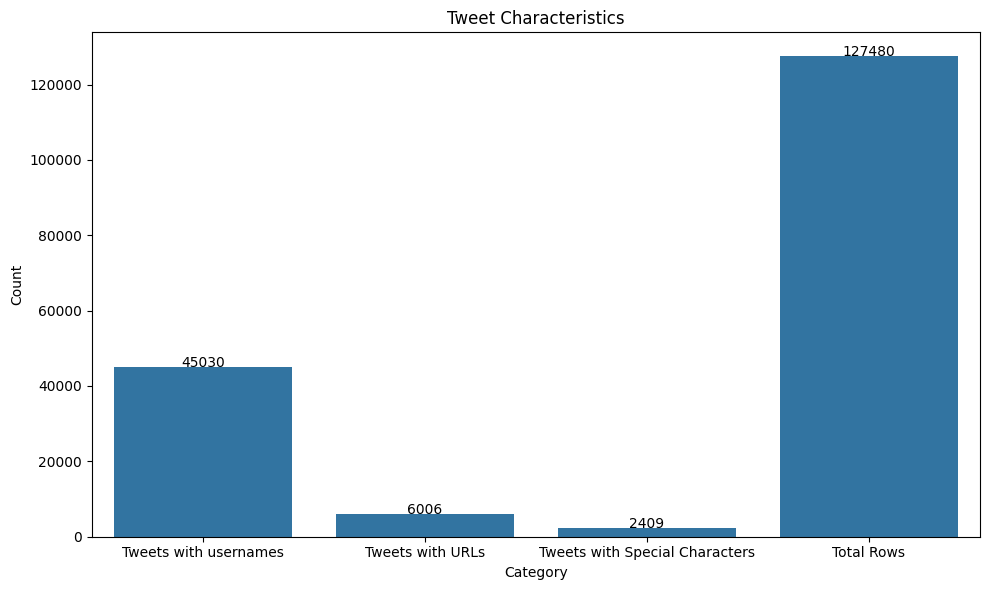

In [ ]:
# Create a DataFrame to store the data
data_to_plot = pd.DataFrame({'Category': ['Tweets with usernames', 'Tweets with URLs', 'Tweets with Special Characters', 'Total Rows'],
                             'Count': [tweets_with_usernames, tweets_with_urls, tweets_with_special_char, total_rows]})

# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(x='Category', y='Count', data=data_to_plot)
# Add labels and title
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Tweet Characteristics")

# Add count above each bar graph
for bar, count in zip(ax.patches, data_to_plot['Count']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, count, ha='center')

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
#Data Preprocessing
import re
import numpy as np
def remove_usernames(text):
    # Define a regex pattern to match usernames
    username_pattern = r'@[\w]+'

    # Use the sub() function to replace all matched usernames with an empty string
    cleaned_tweet = re.sub(username_pattern, '', text)

    return cleaned_tweet


In [ ]:
#remover usernames
df['text'] = df['text'].apply(remove_usernames)
df

,text,sentiment,initial_tweet_length
0,"I`d have responded, if I were going",2,10
1,Sooo SAD I will miss you here in San Diego!!!,0,13
2,my boss is bullying me...,0,6
3,what interview! leave me alone,0,6
4,"Sons of ****, why couldn`t they put them on t...",0,20
...,...,...,...
127475,Now need 8 followers to compleate 1000 Follow,1,10
127476,I knew I had to explain something to my friend...,1,20
127477,done tweeting..... til tomorrow..,1,6
127478,Act II set is pretty breath-taking -Love the ...,1,25


In [ ]:
def remove_urls(text):
    # Use a regular expression to remove URLs
    return re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)


In [ ]:
df['text'] = df['text'].apply(remove_urls)
df.tail(30)

,text,sentiment,initial_tweet_length
127450,tell that to the Po Po,1,8
127451,I m in Rotterdam every Tuesday,1,11
127452,Good Morning lol,1,5
127453,"I have been smiling all morning, I think it's...",1,20
127454,"-- shit, everywhere! I don't discriminate.",1,12
127455,- Yes! Hubs brought some home on his way home...,1,24
127456,Work laptop completely dead for 2nd time in 2 ...,1,31
127457,Good Morning,1,2
127458,20mins on the Bowflex now bfast and tv then li...,1,21
127459,thanks for passing on the words... some ...,1,25


In [ ]:
#Removing Punctuations, Numbers, and Special Characters

df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")
df['text'] = df['text'].str.replace("#", "")
df

<ipython-input-20-f337b6d0eb2a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")


,text,sentiment,initial_tweet_length
0,I d have responded if I were going,2,10
1,Sooo SAD I will miss you here in San Diego,0,13
2,my boss is bullying me,0,6
3,what interview leave me alone,0,6
4,Sons of why couldn t they put them on t...,0,20
...,...,...,...
127475,Now need followers to compleate Follow,1,10
127476,I knew I had to explain something to my friend...,1,20
127477,done tweeting til tomorrow,1,6
127478,Act II set is pretty breath taking Love the ...,1,25


In [ ]:
#Tokenization
df["text"] = df["text"].apply(lambda x: x.split())
df.head()

,text,sentiment,initial_tweet_length
0,"[I, d, have, responded, if, I, were, going]",2,10
1,"[Sooo, SAD, I, will, miss, you, here, in, San,...",0,13
2,"[my, boss, is, bullying, me]",0,6
3,"[what, interview, leave, me, alone]",0,6
4,"[Sons, of, why, couldn, t, they, put, them, on...",0,20


In [ ]:
#Stemming and Lemmatization
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
df["text"] = df["text"].apply(lambda x: [stemmer.stem(i) for i in x])
df.head()

,text,sentiment,initial_tweet_length
0,"[i, d, have, respond, if, i, were, go]",2,10
1,"[sooo, sad, i, will, miss, you, here, in, san,...",0,13
2,"[my, boss, is, bulli, me]",0,6
3,"[what, interview, leav, me, alon]",0,6
4,"[son, of, whi, couldn, t, they, put, them, on,...",0,20


In [ ]:
#Removing Stopwords
nltk.download('stopwords')


# Define a list of stopwords for text processing
stopwords = nltk.corpus.stopwords.words("english")

def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['text'] = df['text'].apply(process)
df.head()


,text,sentiment,initial_tweet_length
0,"[respond, go]",2,10
1,"[diego, sooo, san, miss, sad]",0,13
2,"[boss, bulli]",0,6
3,"[alon, leav, interview]",0,6
4,"[releas, son, bought, put, whi, alreadi]",0,20


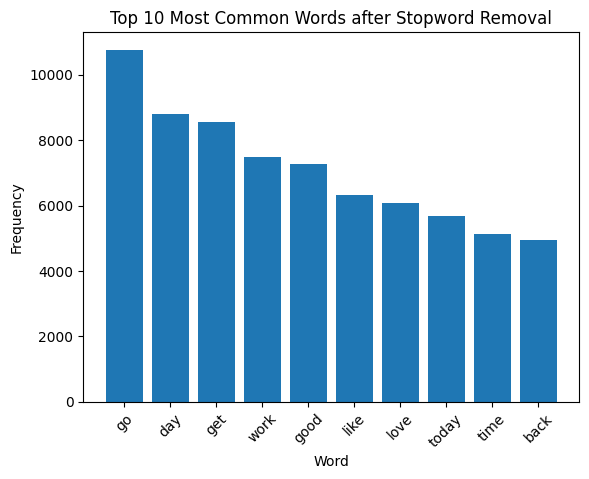

In [ ]:
# Flatten the list of processed words
# Apply text processing to the 'text' column
from collections import Counter

# Now you can use Counter class

df['text'] = df['text'].apply(process)
all_words = [word for sublist in df['text'] for word in sublist]

# Count the occurrences of each word
word_counts = Counter(all_words)

# Get the top 10 most common words
top_words = word_counts.most_common(10)

# Create a bar plot for the top words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])

# Add labels and title
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words after Stopword Removal')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

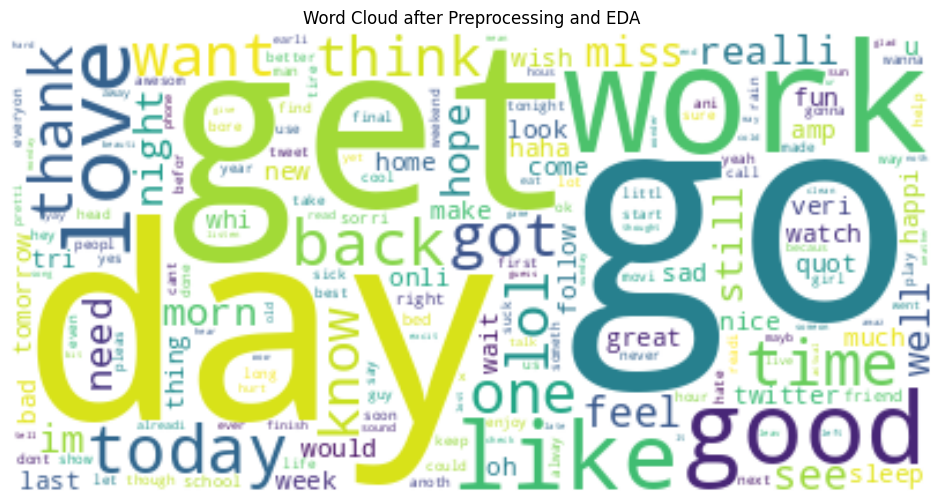

In [ ]:
#data visulizing after preprocessing EDA
# get individual words
from collections import Counter

# Import libraries for natural language processing
from wordcloud import WordCloud

words = []
for line in df["text"]:
    words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color="white",
    max_words=1000,
    colormap='viridis',
    stopwords=stopwords
    ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud after Preprocessing and EDA")
plt.axis("off")
plt.show()

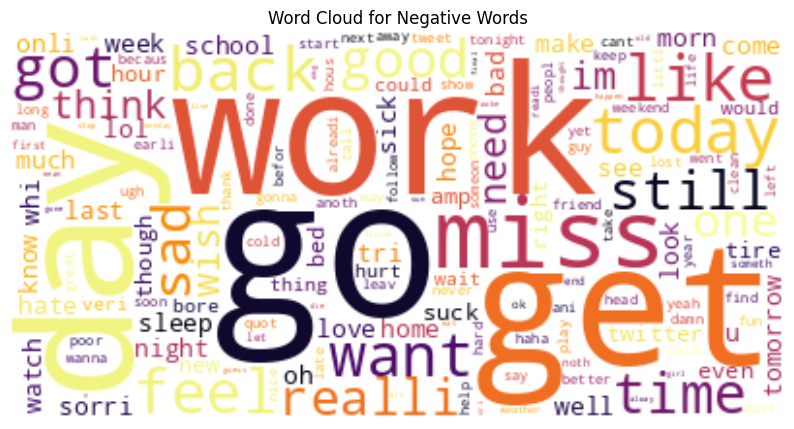

In [ ]:
#Visualising most common words that are being labelled as 'Negative'
# get individual words
words = []
for line in df['text'][df['sentiment']==0.0]:
    words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color="white",
    max_words=500,
    colormap='inferno',
    stopwords=stopwords
    ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud for Negative Words")
plt.axis("off")
plt.show()


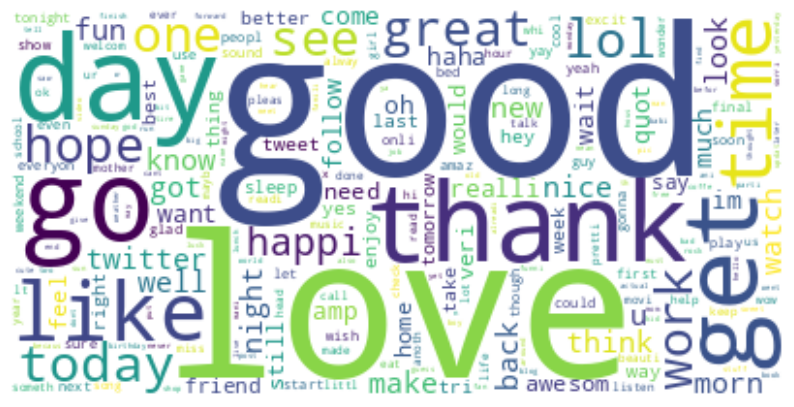

In [ ]:
#Visualising most common words that are being labelled as 'Positive'
# get individual words
words = []
for line in df['text'][df['sentiment']==1.0]:
    words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color="white",
    max_words=500,
    stopwords=stopwords
    ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

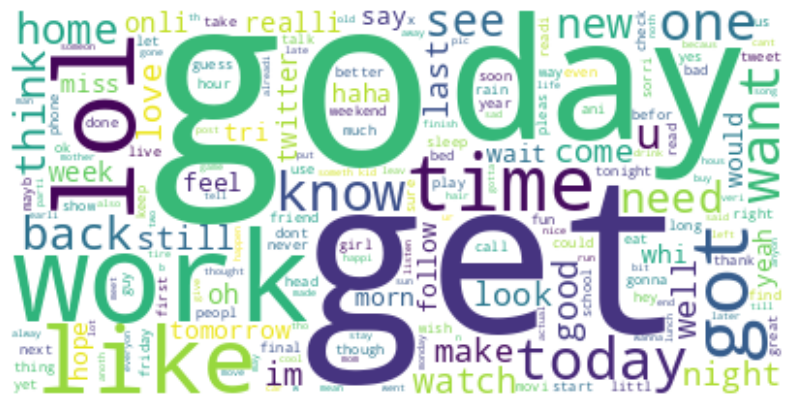

In [ ]:
#Visualising most common words that are being labelled as 'Neutral'
# get individual words
words = []
for line in df['text'][df['sentiment']==2.0]:
    words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color="white",
    max_words=500,
    stopwords=stopwords
    ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# joining individual tokens into a string to fit into vectorizer
df['text'] = df['text'].apply(lambda x: ' '.join(x))

In [ ]:
from textblob import TextBlob
import pandas as pd

# Assuming df is your DataFrame and 'text' is the column you want to process
# df['text'] = df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

# Apply word correction to the first 5 rows of the 'text' column
df['text'][:5] = df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

# Display the modified DataFrame
print(df['text'][:5])


0                            respond go
1               diego soon san miss sad
2                             bull boss
3                 leave along interview
4    release son bought put who already
Name: text, dtype: object


<ipython-input-32-e2bcc0043de0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][:5] = df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))


In [ ]:
TextBlob(df['text'][5]).ngrams(2)
#N-grams are the combination of multiple words used together.


[WordList(['plug', 'forum']),
 WordList(['forum', 'earth']),
 WordList(['earth', 'best']),
 WordList(['best', 'shameless']),
 WordList(['shameless', 'ranger'])]

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
df

In [ ]:
from textblob import TextBlob

# Assuming 'preprocessed_text' column contains the preprocessed text
preprocessed_texts = df['text']

# Tokenization
tokenized_texts = preprocessed_texts.apply(lambda text: TextBlob(text).words)

# Part-of-speech tagging
pos_tags = preprocessed_texts.apply(lambda text: TextBlob(text).tags)

# Sentiment analysis
sentiments = preprocessed_texts.apply(lambda text: TextBlob(text).sentiment)

# Printing the results
for i in range(len(df)):
    print(f"Text: {preprocessed_texts[i]}")
    print(f"Tokenized: {tokenized_texts[i]}")
    print(f"POS Tags: {pos_tags[i]}")
    print(f"Sentiment: {sentiments[i]}")
    print("\n")


In [ ]:
from gensim.models import Word2Vec

In [ ]:
# Train Word2Vec model
model = Word2Vec(tokenized_texts , vector_size=100, window=5, min_count=1, sg=0)
model

In [80]:
word_embeddings = []
for tokens in tokenized_texts:
    embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    word_embeddings.append(embeddings)

In [83]:
 embeddings

[array([ 1.20872863e-01, -3.95917088e-01,  3.58836025e-01,  3.42900492e-02,
         2.25544665e-02, -4.76999395e-02,  2.54664302e-01,  1.99841425e-01,
        -2.15458497e-01, -1.76164657e-02, -2.53195763e-01, -4.70608361e-02,
         3.45993899e-02,  2.42171243e-01, -1.21830501e-01, -1.60527021e-01,
        -4.23146307e-01,  1.41968861e-01,  3.01224347e-02,  9.88529399e-02,
         8.05443153e-02, -2.95238737e-02,  1.50563776e-01,  1.52936384e-01,
        -9.69614238e-02,  1.59218237e-01, -2.99274456e-02, -5.21268812e-04,
         3.76672819e-02, -5.28159924e-02, -9.97953936e-02,  1.72873452e-01,
        -1.19266547e-01, -1.17498994e-01,  3.27344656e-01,  8.85727555e-02,
        -8.85521919e-02, -4.09300834e-01, -3.47424038e-02, -5.29812217e-01,
        -1.54714391e-01, -1.86867923e-01,  1.80711672e-01, -2.26408616e-01,
         7.51655027e-02, -1.09906524e-01,  1.30840223e-02,  1.17334373e-01,
         2.18538463e-01, -2.16185451e-01, -3.83039355e-01, -1.20313928e-01,
         2.1

In [84]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(, df['sentiment'], test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [64, 127480]

In [78]:
# Apply PCA to reduce dimensionality
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(word_embeddings)

# Plot word embeddings
plt.figure(figsize=(10, 8))
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], alpha=0.5)

# Annotate points with words
for i, word in enumerate(all_words):
    plt.annotate(word, xy=(pca_embeddings[i, 0], pca_embeddings[i, 1]), fontsize=8)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Word Embeddings Visualization')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [ ]:
print("Shape of word_embeddings:",  len(df['text']))
print("Shape of df['sentiment']:", len(df['sentiment']))


Shape of word_embeddings: 127480
Shape of df['sentiment']: 127480


In [ ]:
# Compute similarity between two words
similarity = model.wv.similarity('good', 'follow')
similarity

0.4348811

In [ ]:
# Find the most similar words to a given word
similar_words = model.wv.most_similar('follow', topn=5)
similar_words

[('welcom', 0.8889733552932739),
 ('share', 0.874182403087616),
 ('tweet', 0.8529637455940247),
 ('twitterworld', 0.8463869690895081),
 ('comment', 0.846279501914978)]